Descripción:

El problema consiste en N=15 sistemas que están en un estado inicial excitado, y con el tiempo comienzan a decaer a un estado base. En la prima parte del ejercicio se calculara el tiempo que necesitan las 15 partículas para llegar a un estado base y la acción de decaer o no esta definida por un numero aleatorio el cual si es mayor que 0.5 va decaer de lo contrario va mantenerse en el estado excitado. 

Ya teniendo el problema, se va a ver su repetitividad repitiendo M veces el mismo ejercicio de N partículas decayendo midiendo el tiempo que se demoran en decaer todas las partículas. De este modo se tiene un arreglo de tamaño M, del cual se calcula el valor máximo, el valor mínimo y el promedio. Adicionalmente, se calcula el valor p-value para el sistema. 

Ahora para ver el comportamiento del p-value, se repite el paso anterior del decaimiento de N=15 variando M en un rango de [1,1000] aumentando en pasos de 1. De este modo se obtiene 1000 valores para máximo, el valor mínimo, el promedio y el p-value. Y donde se puede evidenciar que p-value tiene un comportamiento fluctuante y no monotonito decreciente como se esperaría.  Los valores máximo, mínimo y promedio cuando se tiende a M grandes se comportan fluctuante alrededor de un punto.


/projects/sage/sage-6.10/local/lib/python2.7/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/projects/sage/sage-6.10/local/lib/python2.7/site-packages/numpy/core/_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/projects/sage/sage-6.10/local/lib/python2.7/site-packages/scipy/stats/stats.py:3378: RuntimeWarning: invalid value encountered in absolute
  prob = distributions.t.sf(np.abs(t), df) * 2  # use np.abs to get upper tail


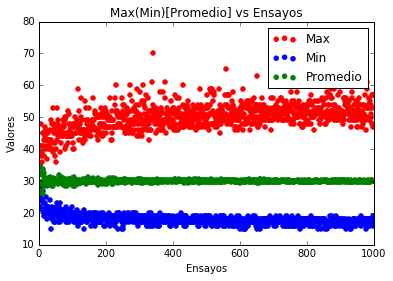

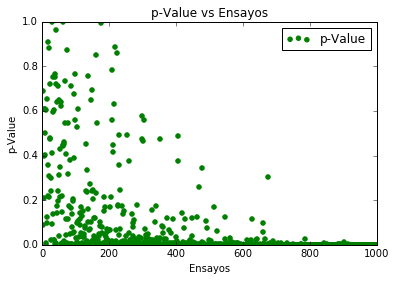

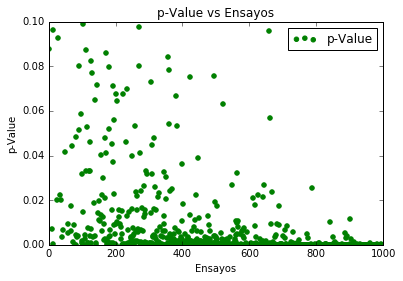

In [1]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import sklearn

from scipy import stats
from scipy.stats import norm



from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs, make_moons
from sklearn.cross_validation import train_test_split


from scipy.optimize import curve_fit
from scipy.misc import factorial





# se declara una funcion que realiza los decaimientos

#random.seed()
def decaimiento(count):
    time1 = 0
    while (count > 0):
        #print("The count is:", count)
        time1 = time1 + 1
        if  rn.random()>0.5:
            count = count - 1
        else:
            count=count
    return time1


#ejemplos
dato1 = 10 # repeticion del experimento
dato2 = 5 # numero de particulas

#Se declara una funcion que repite los decaimiento n veces

def repeticion(dato1, dato2):
    
    tabla=np.zeros(dato1)
    #print(dato1, dato2)
    pruebas=range(dato1)
    for i in pruebas:
        
        time = decaimiento(dato2)
        tabla[i]=time
    
    return tabla

# --------------------------------------parametros variables




#-----------------------------------------------------------
experimento=1000

data2=np.zeros(experimento)
data3=np.zeros(experimento)
data4=np.zeros(experimento)
data5=np.zeros(experimento)
data6=np.zeros(experimento)

intentos = 0
i=0

count2 = 15

while(intentos<experimento):
    
    count1 = 1*(1+intentos)
    
    data1=repeticion(count1, count2)
   
    data2[i]=data1.max()
    data3[i]=data1.min()
    data4[i]=data1.mean()
    
    data6[i]=count1
    
    m=30.9
    st, pv = stats.ttest_1samp(data1, m)
    data5[i]=pv
    intentos=intentos+1
    i=i+1



#print(data5)

#-----------------------------------------------------------


m1=plt.scatter(data6,data2,color='red',label='Line 1')

m2=plt.scatter(data6,data3,color='blue')

m3=plt.scatter(data6,data4,color='green')

plt.legend([m1, m2, m3], ["Max", "Min", "Promedio"])
#entries, bin_edges, patches = plt.hist(data1, bins=100, normed=True)

plt.title("Max(Min)[Promedio] vs Ensayos")
plt.xlabel("Ensayos")
plt.ylabel("Valores")
plt.xlim(0,1000)
plt.show()

p=plt.scatter(data6,data5,color='Green')
plt.legend([p], ["p-Value"])

plt.title("p-Value vs Ensayos")
plt.xlabel("Ensayos")
plt.ylabel("p-Value")

plt.xlim(0,1000)
plt.ylim(0,1)
plt.show()



p=plt.scatter(data6,data5,color='Green')
plt.legend([p], ["p-Value"])

plt.title("p-Value vs Ensayos")
plt.xlabel("Ensayos")
plt.ylabel("p-Value")

plt.xlim(0,1000)
plt.ylim(0,0.1)
plt.show()



Grafica 1. Contiene el valor máximo, minimo y el promedio en función del M.
Grafica 2. Contiene el P-value para todo el rango de M
Grafica 3. Es un zoom alrededor 5% del P-Value en todo el rango de M.
